In [ ]:
import kagglehub                              # Library to load datasets from Kaggle
from kagglehub import KaggleDatasetAdapter    # Adapter to load dataset as pandas DataFrame


file_path = "HAM10000_metadata.csv"           # Metadata file name


df = kagglehub.dataset_load(                   # Load dataset using KaggleHub
    KaggleDatasetAdapter.PANDAS,               # Load data as pandas DataFrame
    "kmader/skin-cancer-mnist-ham10000",       # Dataset name on Kaggle
    file_path                                  # File path inside dataset
)

print("First 5 records:", df.head())           # Display first 5 rows


Using Colab cache for faster access to the 'skin-cancer-mnist-ham10000' dataset.
First 5 records:      lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [ ]:
import pandas as pd                            # Pandas for data handling
import os                                     # OS module for file paths


base_dir = '/kaggle/input/skin-cancer-mnist-ham10000/'   # Dataset base directory
df = pd.read_csv(os.path.join(base_dir, 'HAM10000_metadata.csv'))  # Read CSV file

lesion_type_dict = {                           # Dictionary for class name mapping
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df['cell_type'] = df['dx'].map(lesion_type_dict)   # Map diagnosis codes to class names
df['label'] = pd.Categorical(df['dx']).codes       # Convert classes to numeric labels


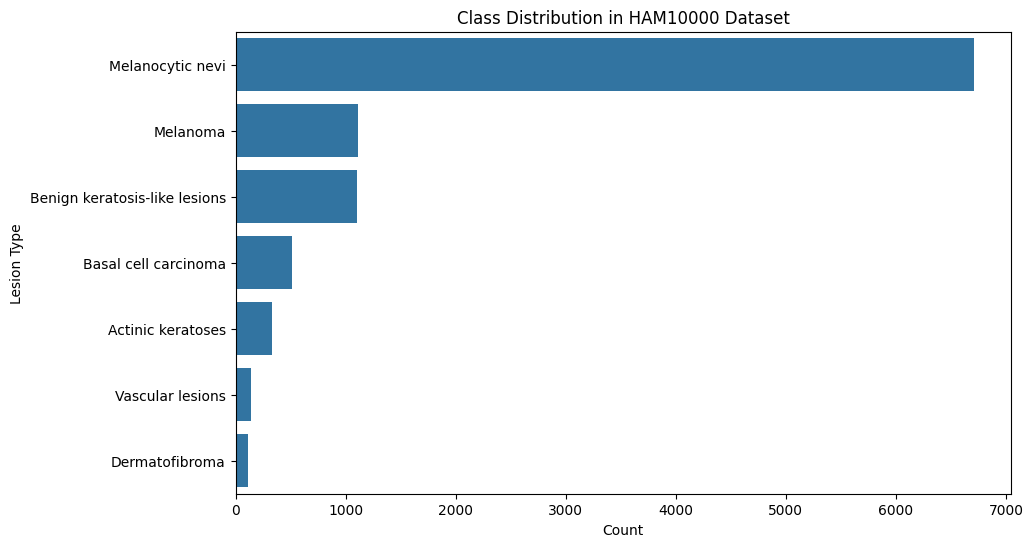

In [ ]:
import matplotlib.pyplot as plt       # Used for plotting graphs and images
import seaborn as sns                 # Used for advanced data visualization


plt.figure(figsize=(10, 6))                         # Set figure size
sns.countplot(y='cell_type', data=df,
              order=df['cell_type'].value_counts().index)  # Plot class distribution
plt.title('Class Distribution in HAM10000 Dataset') # Set plot title
plt.xlabel('Count')                                 # X-axis label
plt.ylabel('Lesion Type')                           # Y-axis label
plt.savefig('class_distribution.png')               # Save the figure
plt.show()                                          # Display the plot



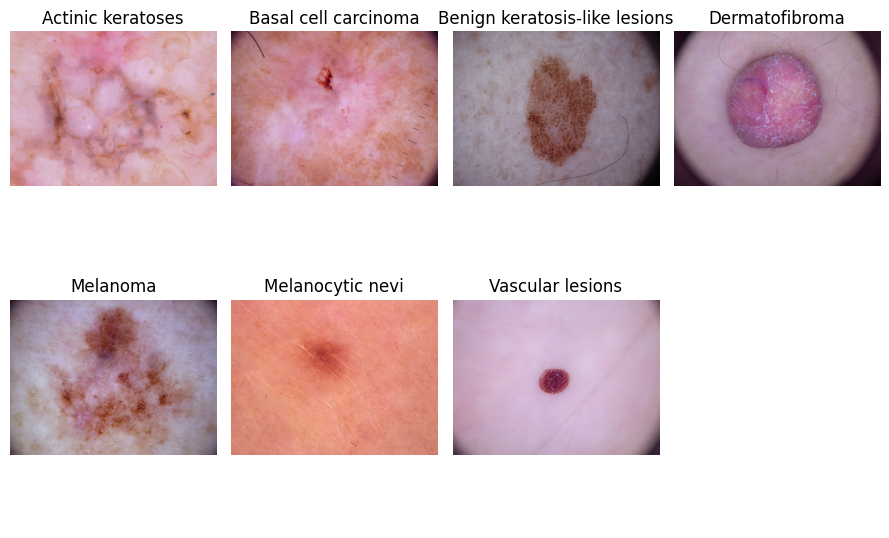

Total images: 10015
Classes: 7


In [ ]:
from PIL import Image                               # Library to handle images

fig, axes = plt.subplots(2, 4, figsize=(9, 6))      # Create subplot grid
axes = axes.ravel()                                 # Flatten axes array  ء(bt7awl mn 2d --> 1d)

for i, ax in enumerate(axes):                       # Loop through axes
    if i < 7:
        sample = df[df['label'] == i].sample(1).iloc[0]  # Select random image
        img_path = os.path.join(base_dir,
                                'ham10000_images_part_1',
                                f"{sample['image_id']}.jpg")  # Image path
        if not os.path.exists(img_path):             # Check second folder if needed
            img_path = os.path.join(base_dir,
                                    'ham10000_images_part_2',
                                    f"{sample['image_id']}.jpg")
        img = Image.open(img_path)                   # Open image
        ax.imshow(img)                               # Show image
        ax.set_title(lesion_type_dict[sample['dx']])# Set image title
        ax.axis('off')                               # Hide axis
    else:
        ax.axis('off')                               # Hide unused axes

plt.tight_layout()                                  # Adjust layout
plt.savefig('sample_images.png')                    # Save figure
plt.show()                                          # Display images

print(f'Total images: {len(df)}')
print(f'Classes: {df["label"].nunique()}')

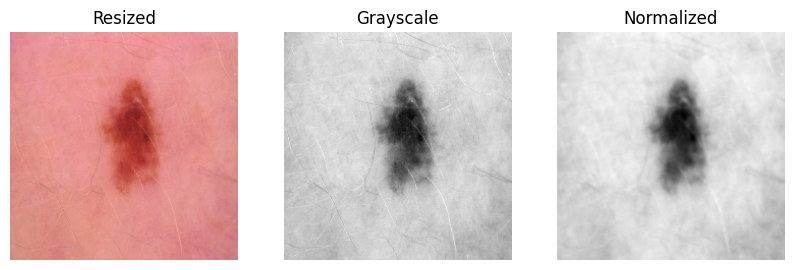

In [ ]:
import cv2                                         # OpenCV for image processing

sample = df.sample(1).iloc[0]                      # Select random sample
image_id = sample['image_id']                      # Get image ID

p1 = os.path.join(base_dir, 'ham10000_images_part_1', f"{image_id}.jpg")  # Path part 1
p2 = os.path.join(base_dir, 'ham10000_images_part_2', f"{image_id}.jpg")  # Path part 2

img_path = p1 if os.path.exists(p1) else p2         # Select valid image path

img = cv2.imread(img_path)                          # Read image
img_resized = cv2.resize(img, (224, 224))           # Resize image
gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)# Convert to grayscale
blur = cv2.GaussianBlur(gray, (5, 5), 0)            # Apply Gaussian blur
normalized = blur / 255.0                           # Normalize pixel values


plt.figure(figsize=(10,4))                          # Create a figure with specific size

titles = ["Resized", "Grayscale", "Normalized"]     # Titles for each displayed image
images = [cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB),  # Convert resized image from BGR to RGB
          gray,                                     # Grayscale image
          normalized]                               # Normalized image

for i, (title, im) in enumerate(zip(titles, images)):  # Loop through titles and images
    plt.subplot(1, 3, i+1)                          # Create subplot (1 row, 3 columns)
    plt.imshow(im, cmap='gray' if i > 0 else None)  # Display image (gray colormap for grayscale & normalized)
    plt.title(title)                                # Set title for each subplot
    plt.axis('off')                                 # Hide axis

plt.show()                                          # Display the figure



In [ ]:
df = df.drop(['age', 'sex', 'localization'], axis=1)   # Remove columns not used in training


In [ ]:
df.info()                                              # Display dataset information and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lesion_id  10015 non-null  object
 1   image_id   10015 non-null  object
 2   dx         10015 non-null  object
 3   dx_type    10015 non-null  object
 4   cell_type  10015 non-null  object
 5   label      10015 non-null  int8  
dtypes: int8(1), object(5)
memory usage: 401.1+ KB


In [ ]:
print(f"Total images: {len(df)}")                       # Print total number of images
print(f"Unique lesions (lesion_id): {df['lesion_id'].nunique()}")  # Number of unique lesions
print(f"Duplicate images: {len(df) - df['lesion_id'].nunique()}")  # Number of duplicates

df = df.drop_duplicates(subset=['lesion_id'], keep='first')  # Remove duplicate lesion images

print("\nAfter removing duplicates:")                  # Print message
print(f"Total images: {len(df)}")                       # Total images after cleaning
print(f"Unique lesions (lesion_id): {df['lesion_id'].nunique()}")  # Unique lesions count


Total images: 10015
Unique lesions (lesion_id): 7470
Duplicate images: 2545

After removing duplicates:
Total images: 7470
Unique lesions (lesion_id): 7470


In [ ]:
import tensorflow as tf                                # TensorFlow for deep learning
import numpy as np                                     # NumPy for numerical operations
import matplotlib.pyplot as plt                        # Matplotlib for plotting
import seaborn as sns                                  # Seaborn for visualization
from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics
from PIL import Image                                  # Image processing


In [ ]:
def get_image_path(image_id):                           # Function to get full image path
    p1 = os.path.join(base_dir, 'ham10000_images_part_1', f"{image_id}.jpg")  # Path option 1
    p2 = os.path.join(base_dir, 'ham10000_images_part_2', f"{image_id}.jpg")  # Path option 2
    return p1 if os.path.exists(p1) else p2             # Return existing path


In [ ]:
class_names = sorted(df["cell_type"].unique())          # List of class names
num_classes = len(class_names)                          # Number of classes

# Map class names → integer labels
label_to_idx = {name: i for i, name in enumerate(class_names)}   # Create dictionary mapping class name to index
df["label_idx"] = df["cell_type"].map(label_to_idx)             # Convert class names to numeric labels

# Pre-compute full image paths
df['image_full_path'] = df['image_id'].apply(get_image_path)    # Add full image path for each image

# Train / val / test split
from sklearn.model_selection import train_test_split             # Import function to split dataset

train_df, temp_df = train_test_split(
    df, test_size=0.25, stratify=df['label_idx'])               # Split data into training and temporary set

val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df['label_idx'])      # Split temporary set into validation and test

# Loader function
def load_image_and_label(img_path, label):                       # Function to load image and its label(tensorflow)
    img = tf.io.read_file(img_path)                              # Read image file from disk
    img = tf.image.decode_jpeg(img, channels=3)                 # Decode JPEG image as RGB
    img = tf.image.resize(img, (224, 224))                       # Resize image to 224x224
    img = img / 255.0                                            # Normalize pixel values to range [0, 1]
    return img, label                                            # Return processed image and label

# Build tf.data pipelines
def build_dataset(dataframe, batch=32):                          # Create TensorFlow dataset pipeline
    # Use pre-computed paths
    paths = dataframe["image_full_path"].values                  # Extract image paths
    labels = dataframe["label_idx"].values                       # Extract image labels
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))    # Create dataset from paths and labels
    ds = ds.map(lambda path_, lbl: load_image_and_label(path_, lbl),
                num_parallel_calls=tf.data.AUTOTUNE)             # Load and preprocess images in parallel(TensorFlow يختار أفضل عدد Threads تلقائيًا.)
    ds = ds.shuffle(500).batch(batch).prefetch(tf.data.AUTOTUNE) # Shuffle, batch, and prefetch data
    return ds                                                    # Return prepared dataset

train_ds = build_dataset(train_df)                               # Build training dataset
val_ds   = build_dataset(val_df)                                 # Build validation dataset
test_ds  = build_dataset(test_df)                                # Build test dataset

print("Dataset Ready:", len(train_df), "train /",                # Print dataset sizes
      len(val_df), "val /", len(test_df), "test")


Dataset Ready: 5602 train / 934 val / 934 test


In [ ]:
from sklearn.utils.class_weight import compute_class_weight  # Handle class imbalance

class_weights = compute_class_weight(
    'balanced',                                          # Balance class frequencies(weight(i)=n/n*c(i))
    classes=np.unique(train_df['label_idx']),            # Unique classes
    y=train_df['label_idx']                               # Training labels
)

class_weight_dict = dict(enumerate(class_weights))        # Convert to dictionary
print("Class Weights:", class_weight_dict)                # Display class weights


Class Weights: {0: np.float64(4.680033416875522), 1: np.float64(3.266472303206997), 2: np.float64(1.4684141546526868), 3: np.float64(14.550649350649351), 4: np.float64(0.19750387815540826), 5: np.float64(1.7397515527950311), 6: np.float64(10.814671814671815)}


In [ ]:
data_augmentation = tf.keras.Sequential([               # Data augmentation pipeline
    tf.keras.layers.RandomFlip("horizontal"),            # Random horizontal flip
    tf.keras.layers.RandomRotation(0.2),                 # Random rotation
    tf.keras.layers.RandomZoom(0.2),                     # Random zoom
    tf.keras.layers.RandomContrast(0.2),                 # Random contrast
], name="data_augmentation")

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,                                   # Remove classification head
    weights="imagenet",                                  # Pretrained ImageNet weights
    input_shape=(224, 224, 3)                             # Input image size
)


base_model.trainable = False                             # Freeze base model layers(we use it as a Feature Extractor)

inputs = tf.keras.Input(shape=(224, 224, 3))             # Model input layer
x = data_augmentation(inputs)                            # Apply data augmentation
x = base_model(x, training=False)                        # Extract features
x = tf.keras.layers.GlobalAveragePooling2D()(x)          # Global average pooling(allt 3dd el parameters w el overfitting)
x = tf.keras.layers.Dropout(0.3)(x)                      # Dropout for regularization(nsaghar el weight)
outputs = tf.keras.layers.Dense(num_classes,
                                activation="softmax")(x)  # Output layer


model = tf.keras.Model(inputs, outputs)                  # Build model

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),            # Adam optimizer(y2ll el ghltat)
    loss="sparse_categorical_crossentropy",              # Classification loss
    metrics=["accuracy"]                                 # Evaluation metric
)


model.summary()                                          # Display model architecture


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │         8,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,058,538 (15.48 MB)

 Trainable params: 8,967 (35.03 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',                              # Monitor validation loss
        patience=5,                                      # Stop after no improvement
        restore_best_weights=True,                       # Restore best model
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',                              # Monitor validation loss
        factor=0.5,                                      # Reduce learning rate
        patience=3,
        verbose=1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.keras',                              # Save best model
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        verbose=1
    )
]


In [ ]:
history = model.fit(
    train_ds,                                            # Training data
    validation_data=val_ds,                              # Validation data
    epochs=15,                                           # Number of epochs
    class_weight=class_weight_dict,                      # Handle class imbalance
    callbacks=callbacks,                                 # Training callbacks
    verbose=1
)


Epoch 1/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.1304 - loss: 2.0206
Epoch 1: val_loss improved from inf to 2.21483, saving model to best_model.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 55s 220ms/step - accuracy: 0.1303 - loss: 2.0204 - val_accuracy: 0.0128 - val_loss: 2.2148 - learning_rate: 0.0010
Epoch 2/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.0680 - loss: 2.0640
Epoch 2: val_loss improved from 2.21483 to 2.11969, saving model to best_model.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 40s 217ms/step - accuracy: 0.0683 - loss: 2.0635 - val_accuracy: 0.0300 - val_loss: 2.1197 - learning_rate: 0.0010
Epoch 3/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.1054 - loss: 2.1043
Epoch 3: val_loss improved from 2.11969 to 1.91871, saving model to best_model.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 38s 203ms/step - accuracy: 0.1057 - loss: 2.1034 - val_accuracy: 0.0300 - val_loss: 1.9187 - learning_rate: 0.0010
Epoch 4/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

In [ ]:
base_model.trainable = True                              # Unfreeze base model
for layer in base_model.layers[:-20]:
    layer.trainable = False                              # Freeze lower layers

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),            # Recompile model
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


history = model.fit(
    train_ds,                                            # Training data
    validation_data=val_ds,                              # Validation data
    epochs=15,                                           # Number of epochs
    class_weight=class_weight_dict,                      # Handle class imbalance
    callbacks=callbacks,                                 # Training callbacks
    verbose=1
)


Epoch 1/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.1025 - loss: 2.2219
Epoch 1: val_loss did not improve from 1.83693
176/176 ━━━━━━━━━━━━━━━━━━━━ 59s 242ms/step - accuracy: 0.1024 - loss: 2.2205 - val_accuracy: 0.0824 - val_loss: 2.0085 - learning_rate: 0.0010
Epoch 2/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.0809 - loss: 2.1373
Epoch 2: val_loss did not improve from 1.83693
176/176 ━━━━━━━━━━━━━━━━━━━━ 38s 203ms/step - accuracy: 0.0808 - loss: 2.1361 - val_accuracy: 0.0096 - val_loss: 2.2491 - learning_rate: 0.0010
Epoch 3/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.1142 - loss: 2.0325
Epoch 3: val_loss did not improve from 1.83693
176/176 ━━━━━━━━━━━━━━━━━━━━ 38s 204ms/step - accuracy: 0.1141 - loss: 2.0322 - val_accuracy: 0.0974 - val_loss: 1.8963 - learning_rate: 0.0010
Epoch 4/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.0520 - loss: 2.0197
Epoch 4: val_loss did not improve from 1.83693
176/176 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
y_true = []                                         # Store true labels
y_pred_proba = []                                  # Store predicted probabilities

for images, labels in val_ds:                      # Loop over validation dataset
    preds = model.predict(images, verbose=0)      # Predict probabilities for each batch
    y_true.extend(labels.numpy())                  # Append true labels
    y_pred_proba.extend(preds)                     # Append predicted probabilities

y_true = np.array(y_true)                          # Convert true labels to NumPy array
y_pred_proba = np.array(y_pred_proba)              # Convert predictions to NumPy array

# Per-class AUC
print("\nPer-Class AUC Scores:")
for i, class_name in enumerate(class_names):       # Loop over each class
    y_true_binary = (y_true == i).astype(int)      # Convert labels to binary (one-vs-rest)
    y_pred_binary = y_pred_proba[:, i]             # Probabilities for current class
    try:
        auc_score = roc_auc_score(
            y_true_binary, y_pred_binary)           # Compute AUC for current class
        print(f"{class_name:30s}: AUC = {auc_score:.4f}")
    except:
        print(f"{class_name:30s}: AUC = N/A")      # Handle cases where AUC can't be computed

# Overall AUC
try:
    overall_auc = roc_auc_score(
        y_true,
        y_pred_proba,
        multi_class='ovr',
        average='macro'
    )                                              # Compute macro-averaged multi-class AUC
    print(f"\n{'Overall AUC (macro)':30s}: {overall_auc:.4f}")
except Exception as e:
    print(f"Could not calculate overall AUC: {e}") # Handle overall AUC errors



Per-Class AUC Scores:
Actinic keratoses             : AUC = N/A
Basal cell carcinoma          : AUC = N/A
Benign keratosis-like lesions : AUC = N/A
Dermatofibroma                : AUC = N/A
Melanocytic nevi              : AUC = N/A
Melanoma                      : AUC = N/A
Vascular lesions              : AUC = N/A
Could not calculate overall AUC: name 'roc_auc_score' is not defined


In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=1)             # Evaluate model on test dataset

print(f"\nTest Loss: {test_loss:.4f}")             # Print test loss
print(f"Test Accuracy: {test_acc:.4f}")            # Print test accuracy


30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.1040 - loss: 1.8950

Test Loss: 1.8969
Test Accuracy: 0.0974


In [ ]:
y_true = []                                         # Store true labels
y_pred_proba = []                                  # Store predicted probabilities

for images, labels in val_ds:                      # Loop over validation dataset
    preds = model.predict(images, verbose=0)      # Predict probabilities for each batch
    y_true.extend(labels.numpy())                  # Append true labels
    y_pred_proba.extend(preds)                     # Append predicted probabilities

y_true = np.array(y_true)                          # Convert true labels to NumPy array
y_pred_proba = np.array(y_pred_proba)              # Convert predictions to NumPy array

# Per-class AUC
print("\nPer-Class AUC Scores:")
for i, class_name in enumerate(class_names):       # Loop over each class
    y_true_binary = (y_true == i).astype(int)      # Convert labels to binary (one-vs-rest)
    y_pred_binary = y_pred_proba[:, i]             # Probabilities for current class
    try:
        auc_score = roc_auc_score(
            y_true_binary, y_pred_binary)           # Compute AUC for current class
        print(f"{class_name:30s}: AUC = {auc_score:.4f}")
    except:
        print(f"{class_name:30s}: AUC = N/A")      # Handle cases where AUC can't be computed

# Overall AUC
try:
    overall_auc = roc_auc_score(
        y_true,
        y_pred_proba,
        multi_class='ovr',
        average='macro'
    )                                              # Compute macro-averaged multi-class AUC
    print(f"\n{'Overall AUC (macro)':30s}: {overall_auc:.4f}")
except Exception as e:
    print(f"Could not calculate overall AUC: {e}") # Handle overall AUC errors



Per-Class AUC Scores:
Actinic keratoses             : AUC = N/A
Basal cell carcinoma          : AUC = N/A
Benign keratosis-like lesions : AUC = N/A
Dermatofibroma                : AUC = N/A
Melanocytic nevi              : AUC = N/A
Melanoma                      : AUC = N/A
Vascular lesions              : AUC = N/A
Could not calculate overall AUC: name 'roc_auc_score' is not defined


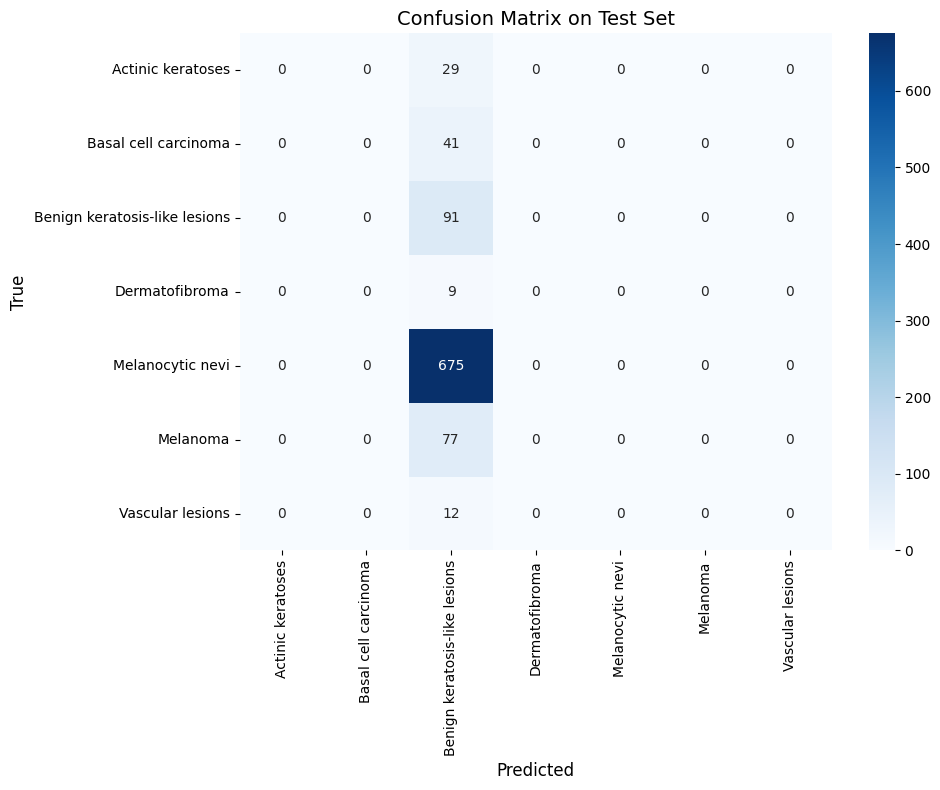


Classification Report:
                               precision    recall  f1-score   support

            Actinic keratoses       0.00      0.00      0.00        29
         Basal cell carcinoma       0.00      0.00      0.00        41
Benign keratosis-like lesions       0.10      1.00      0.18        91
               Dermatofibroma       0.00      0.00      0.00         9
             Melanocytic nevi       0.00      0.00      0.00       675
                     Melanoma       0.00      0.00      0.00        77
             Vascular lesions       0.00      0.00      0.00        12

                     accuracy                           0.10       934
                    macro avg       0.01      0.14      0.03       934
                 weighted avg       0.01      0.10      0.02       934



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_true = []                                        # Store true labels
y_pred = []                                        # Store predicted class indices
y_pred_proba = []                                  # Store predicted probabilities

for images, labels in test_ds:                    # Loop over test dataset
    preds = model.predict(images, verbose=0)      # Predict probabilities
    y_true.extend(labels.numpy())                  # Append true labels
    y_pred.extend(np.argmax(preds, axis=1))        # Append predicted classes
    y_pred_proba.extend(preds)                     # Append prediction probabilities

y_true = np.array(y_true)                          # Convert true labels to NumPy array
y_pred = np.array(y_pred)                          # Convert predictions to NumPy array
y_pred_proba = np.array(y_pred_proba)              # Convert probabilities to NumPy array

cm = confusion_matrix(y_true, y_pred)              # Compute confusion matrix

plt.figure(figsize=(10, 8))                        # Create figure
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)                                                   # Plot confusion matrix heatmap

plt.xlabel("Predicted", fontsize=12)               # X-axis label
plt.ylabel("True", fontsize=12)                    # Y-axis label
plt.title("Confusion Matrix on Test Set", fontsize=14)  # Plot title
plt.tight_layout()                                 # Adjust layout
plt.savefig('confusion_matrix_test.png', dpi=150) # Save figure to file
plt.show()                                         # Display plot

print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names))                                                  # Print precision, recall, F1-score


In [ ]:
def preprocess_single_image(img_path):                   # Preprocess single image
    img = Image.open(img_path).convert("RGB")            # Load image and convert to RGB
    img = img.resize((224, 224))                          # Resize image
    img_array = np.array(img) / 255.0                    # Normalize image
    return np.expand_dims(img_array, axis=0)             # Add batch dimension



def predict_cancer_type(img_path):
    img_array = preprocess_single_image(img_path)  # Load and preprocess single image
    preds = model.predict(img_array)                # Run model inference
    class_idx = np.argmax(preds, axis=1)[0]         # Get predicted class index
    class_name = class_names[class_idx]             # Map index to class name
    confidence = preds[0][class_idx]                # Get confidence score
    return class_name, confidence                   # Return prediction and confidence


# Example:
example_path = get_image_path(
    df.sample(1).iloc[0]["image_id"]
)                                                   # Random image path from dataset

cancer, conf = predict_cancer_type(example_path)   # Predict cancer type
print(f"Predicted: {cancer}   Confidence: {conf:.2f}")  # Print result


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
Predicted: Benign keratosis-like lesions   Confidence: 0.20



Sample Predictions Visualization


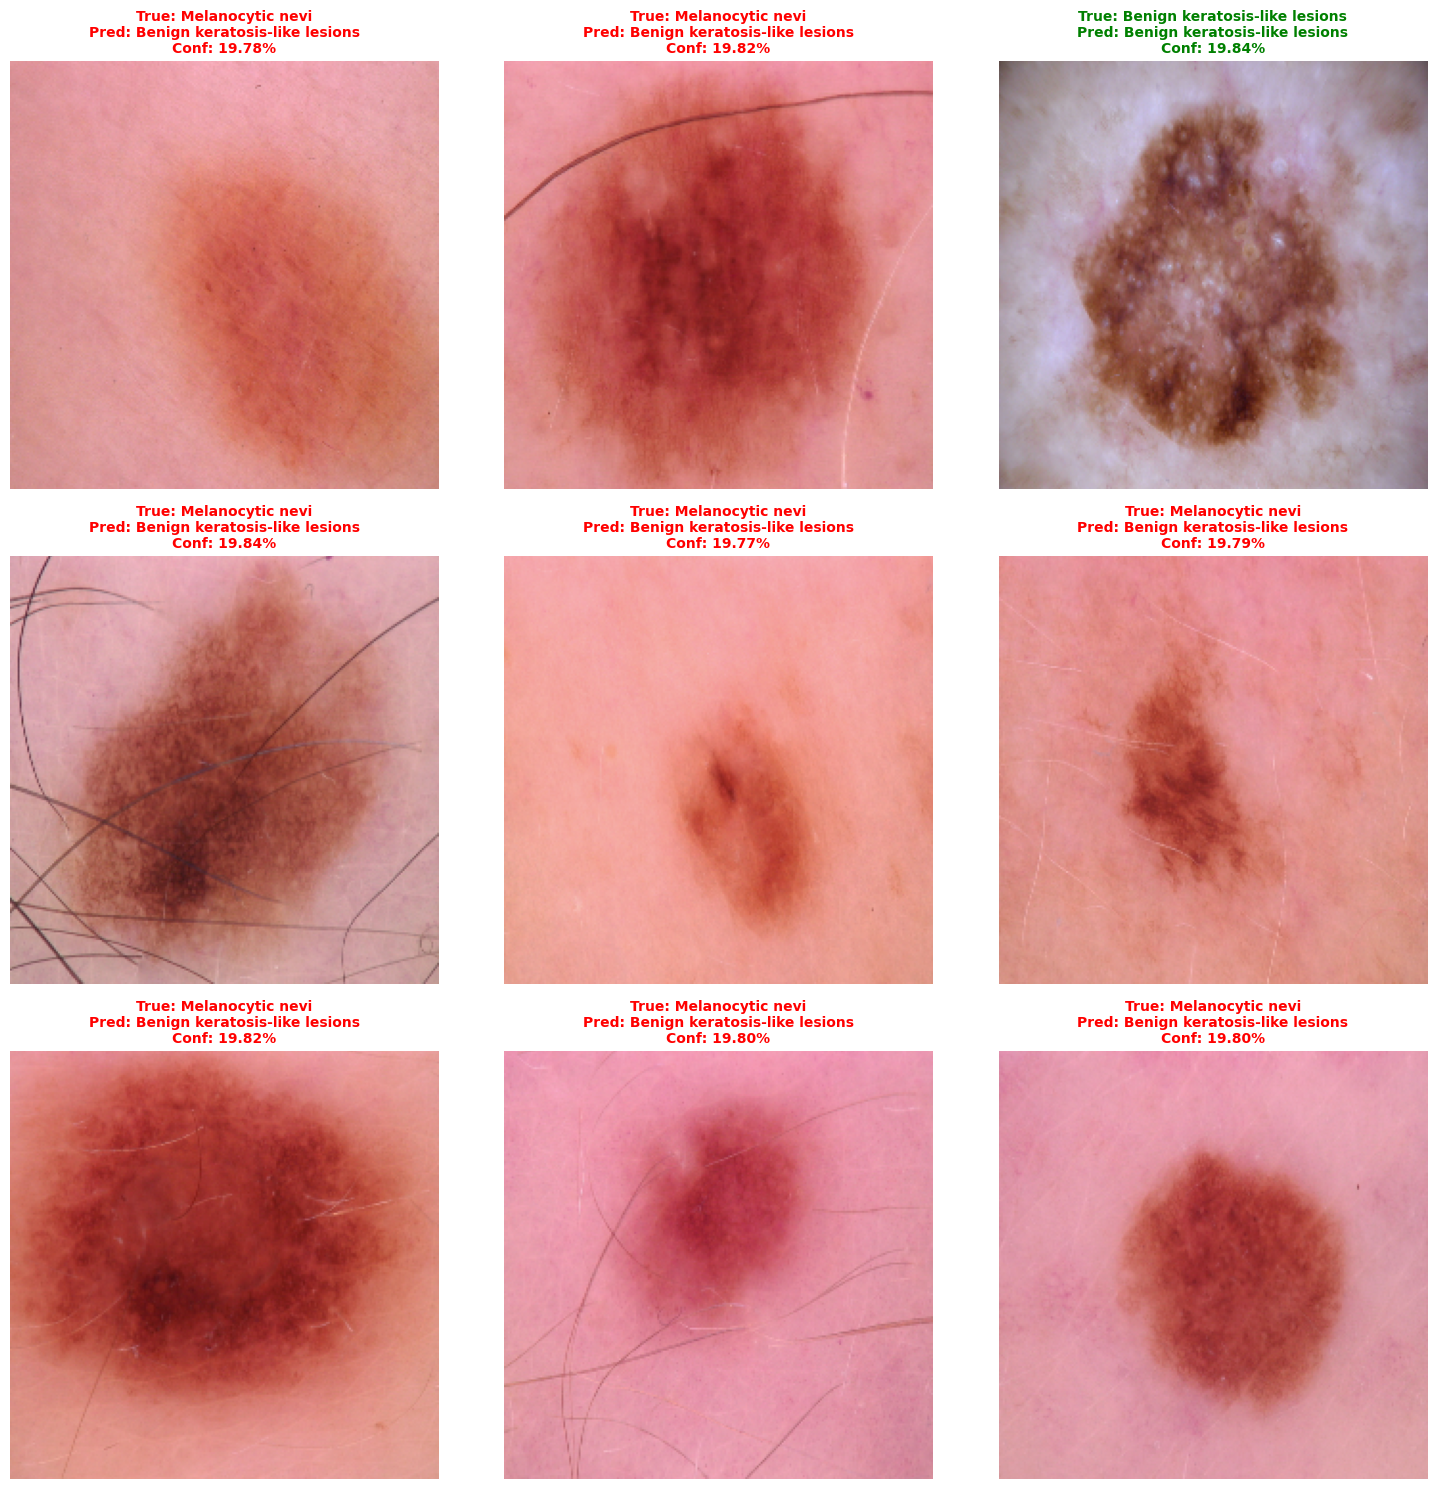

In [ ]:
def visualize_predictions(model, dataset, class_names, num_samples=9):
    """Display model predictions with images"""
    images_list = []                                # Store images
    labels_list = []                                # Store true labels

    for images, labels in dataset.unbatch().batch(num_samples).take(1):
        images_list = images.numpy()                # Convert images to NumPy
        labels_list = labels.numpy()                # Convert labels to NumPy

    preds = model.predict(images_list, verbose=0)  # Predict probabilities
    pred_classes = np.argmax(preds, axis=1)        # Predicted class indices

    fig, axes = plt.subplots(3, 3, figsize=(15, 15))# Create subplot grid
    axes = axes.ravel()                             # Flatten axes array

    for i in range(min(num_samples, len(images_list))):
        axes[i].imshow(images_list[i])              # Show image
        true_label = class_names[labels_list[i]]    # True class name
        pred_label = class_names[pred_classes[i]]   # Predicted class name
        conf = preds[i][pred_classes[i]]            # Confidence score

        color = 'green' if labels_list[i] == pred_classes[i] else 'red'
                                                     # Green if correct, red if wrong

        axes[i].set_title(
            f"True: {true_label}\nPred: {pred_label}\nConf: {conf:.2%}",
            color=color,
            fontsize=10,
            fontweight='bold'
        )                                            # Set title for each image
        axes[i].axis('off')                          # Hide axis

    for i in range(len(images_list), len(axes)):
        axes[i].axis('off')                          # Hide unused subplots

    plt.tight_layout()                               # Adjust layout
    plt.savefig(
        'predictions_visualization.png',
        dpi=150,
        bbox_inches='tight'
    )                                                # Save visualization
    plt.show()                                       # Display figure


print("\n" + "=" * 50)
print("Sample Predictions Visualization")
print("=" * 50)

visualize_predictions(
    model,
    test_ds,
    class_names,
    num_samples=9
)                                                    # Run visualization


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models, optimizers

densenet_base = DenseNet121(
    include_top=False,                             # Remove classification head
    weights='imagenet',                            # Use pretrained ImageNet weights
    input_shape=(224, 224, 3)                      # Input image shape
)
densenet_base.trainable = False                   # Freeze base model weights


In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))      # Model input layer
x = data_augmentation(inputs)                     # Apply data augmentation
x = densenet_base(x, training=False)              # Extract features using DenseNet
x = layers.GlobalAveragePooling2D()(x)            # Reduce spatial dimensions
x = layers.Dropout(0.3)(x)                        # Dropout for regularization
outputs = layers.Dense(
    num_classes,
    activation='softmax')(x)                                              # Output classification layer

densenet_model = models.Model(inputs, outputs)    # Build full model

densenet_model.compile(
    optimizer=optimizers.Adam(1e-3),               # Adam optimizer with LR = 0.001
    loss='sparse_categorical_crossentropy',        # Loss for integer labels
    metrics=['accuracy']                            # Track accuracy
)

densenet_model.summary()                           # Print model architecture


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,044,679 (26.87 MB)

 Trainable params: 7,175 (28.03 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
history_densenet = densenet_model.fit(
    train_ds,                                     # Training dataset
    validation_data=val_ds,                       # Validation dataset
    epochs=15,                                    # Number of epochs
    class_weight=class_weight_dict,               # Handle class imbalance
    callbacks=callbacks,                          # Callbacks (early stopping, etc.)
    verbose=1                                     # Show training progress
)


Epoch 1/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.2749 - loss: 2.0450
Epoch 1: val_loss improved from 1.83693 to 1.35096, saving model to best_model.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 77s 300ms/step - accuracy: 0.2754 - loss: 2.0437 - val_accuracy: 0.5931 - val_loss: 1.3510 - learning_rate: 0.0010
Epoch 2/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.5192 - loss: 1.5080
Epoch 2: val_loss improved from 1.35096 to 1.23479, saving model to best_model.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 46s 251ms/step - accuracy: 0.5194 - loss: 1.5075 - val_accuracy: 0.6253 - val_loss: 1.2348 - learning_rate: 0.0010
Epoch 3/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.5770 - loss: 1.3582
Epoch 3: val_loss improved from 1.23479 to 1.10612, saving model to best_model.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 83s 258ms/step - accuracy: 0.5770 - loss: 1.3583 - val_accuracy: 0.6574 - val_loss: 1.1061 - learning_rate: 0.0010
Epoch 4/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/

In [ ]:
densenet_base.trainable = True                    # Unfreeze base model

for layer in densenet_base.layers[:-20]:
    layer.trainable = False                       # Freeze all except last 20 layers


densenet_model.compile(
    optimizer=optimizers.Adam(1e-4),               # Lower learning rate
    loss='sparse_categorical_crossentropy',        # Same loss function
    metrics=['accuracy']                            # Track accuracy
)


In [ ]:
history_densenet_finetune = densenet_model.fit(
    train_ds,                                     # Training dataset
    validation_data=val_ds,                       # Validation dataset
    epochs=15,                                    # Number of epochs
    class_weight=class_weight_dict,               # Class weights
    callbacks=callbacks,                          # Callbacks
    verbose=1                                     # Show training progress
)


Epoch 1/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.4584 - loss: 1.3997
Epoch 1: val_loss improved from 0.98463 to 0.96855, saving model to best_model.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 65s 265ms/step - accuracy: 0.4589 - loss: 1.3994 - val_accuracy: 0.6938 - val_loss: 0.9685 - learning_rate: 1.0000e-04
Epoch 2/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.5979 - loss: 1.3187
Epoch 2: val_loss did not improve from 0.96855
176/176 ━━━━━━━━━━━━━━━━━━━━ 45s 239ms/step - accuracy: 0.5981 - loss: 1.3178 - val_accuracy: 0.6852 - val_loss: 1.0600 - learning_rate: 1.0000e-04
Epoch 3/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.6288 - loss: 1.2683
Epoch 3: val_loss did not improve from 0.96855
176/176 ━━━━━━━━━━━━━━━━━━━━ 80s 232ms/step - accuracy: 0.6288 - loss: 1.2678 - val_accuracy: 0.6606 - val_loss: 1.1586 - learning_rate: 1.0000e-04
Epoch 4/15
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.6245 - loss: 1.1768
Epoch 4: ReduceLROnPlatea

In [ ]:
test_loss, test_acc = densenet_model.evaluate( test_ds, verbose=1)                           # Evaluate model on test data

print(f"\nTest Loss: {test_loss:.4f}")             # Print test loss
print(f"Test Accuracy: {test_acc:.4f}")            # Print test accuracy

y_true = []                                        # True labels
y_pred = []                                        # Predicted labels
y_pred_proba = []                                  # Predicted probabilities

for images, labels in test_ds:                    # Loop over test dataset
    preds = densenet_model.predict(images, verbose=0)  # Predict batch
    y_true.extend(labels.numpy())                  # Store true labels
    y_pred.extend(np.argmax(preds, axis=1))        # Store predicted classes
    y_pred_proba.extend(preds)                     # Store probabilities

y_true = np.array(y_true)                          # Convert to NumPy
y_pred = np.array(y_pred)                          # Convert to NumPy
y_pred_proba = np.array(y_pred_proba)              # Convert to NumPy


30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.7051 - loss: 0.8575

Test Loss: 0.9072
Test Accuracy: 0.6949


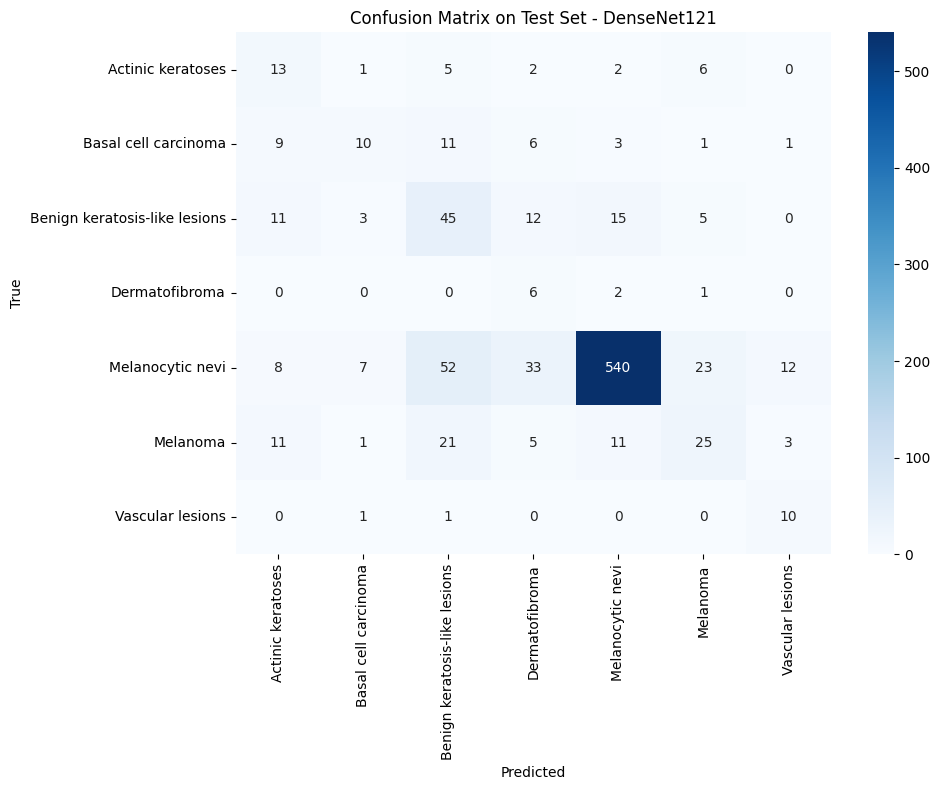


Classification Report:
                               precision    recall  f1-score   support

            Actinic keratoses       0.25      0.45      0.32        29
         Basal cell carcinoma       0.43      0.24      0.31        41
Benign keratosis-like lesions       0.33      0.49      0.40        91
               Dermatofibroma       0.09      0.67      0.16         9
             Melanocytic nevi       0.94      0.80      0.87       675
                     Melanoma       0.41      0.32      0.36        77
             Vascular lesions       0.38      0.83      0.53        12

                     accuracy                           0.69       934
                    macro avg       0.41      0.54      0.42       934
                 weighted avg       0.78      0.69      0.73       934


Per-Class AUC Scores:
Actinic keratoses             : AUC = N/A (no samples)
Basal cell carcinoma          : AUC = N/A (no samples)
Benign keratosis-like lesions : AUC = N/A (no samples)
Derm

In [ ]:
cm = confusion_matrix(y_true, y_pred)              # Compute confusion matrix

plt.figure(figsize=(10, 8))                        # Create figure
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)                                                   # Plot heatmap

plt.xlabel("Predicted")                            # X-axis label
plt.ylabel("True")                                 # Y-axis label
plt.title("Confusion Matrix on Test Set - DenseNet121")  # Plot title
plt.tight_layout()                                 # Adjust layout
plt.savefig('confusion_matrix_densenet.png', dpi=150)   # Save figure
plt.show()                                         # Display plot


# Classification Report
print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
 target_names=class_names
))                                                  # Precision, Recall, F1-score

# Per-Class AUC
print("\nPer-Class AUC Scores:")
for i, class_name in enumerate(class_names):       # Loop over each class
    y_true_binary = (y_true == i).astype(int)      # One-vs-rest labels
    y_pred_binary = y_pred_proba[:, i]             # Probabilities for class
    try:
        auc_score = roc_auc_score(
            y_true_binary, y_pred_binary)           # Compute AUC
        print(f"{class_name:30s}: AUC = {auc_score:.4f}")
    except:
        print(f"{class_name:30s}: AUC = N/A (no samples)")



Sample Predictions Visualization


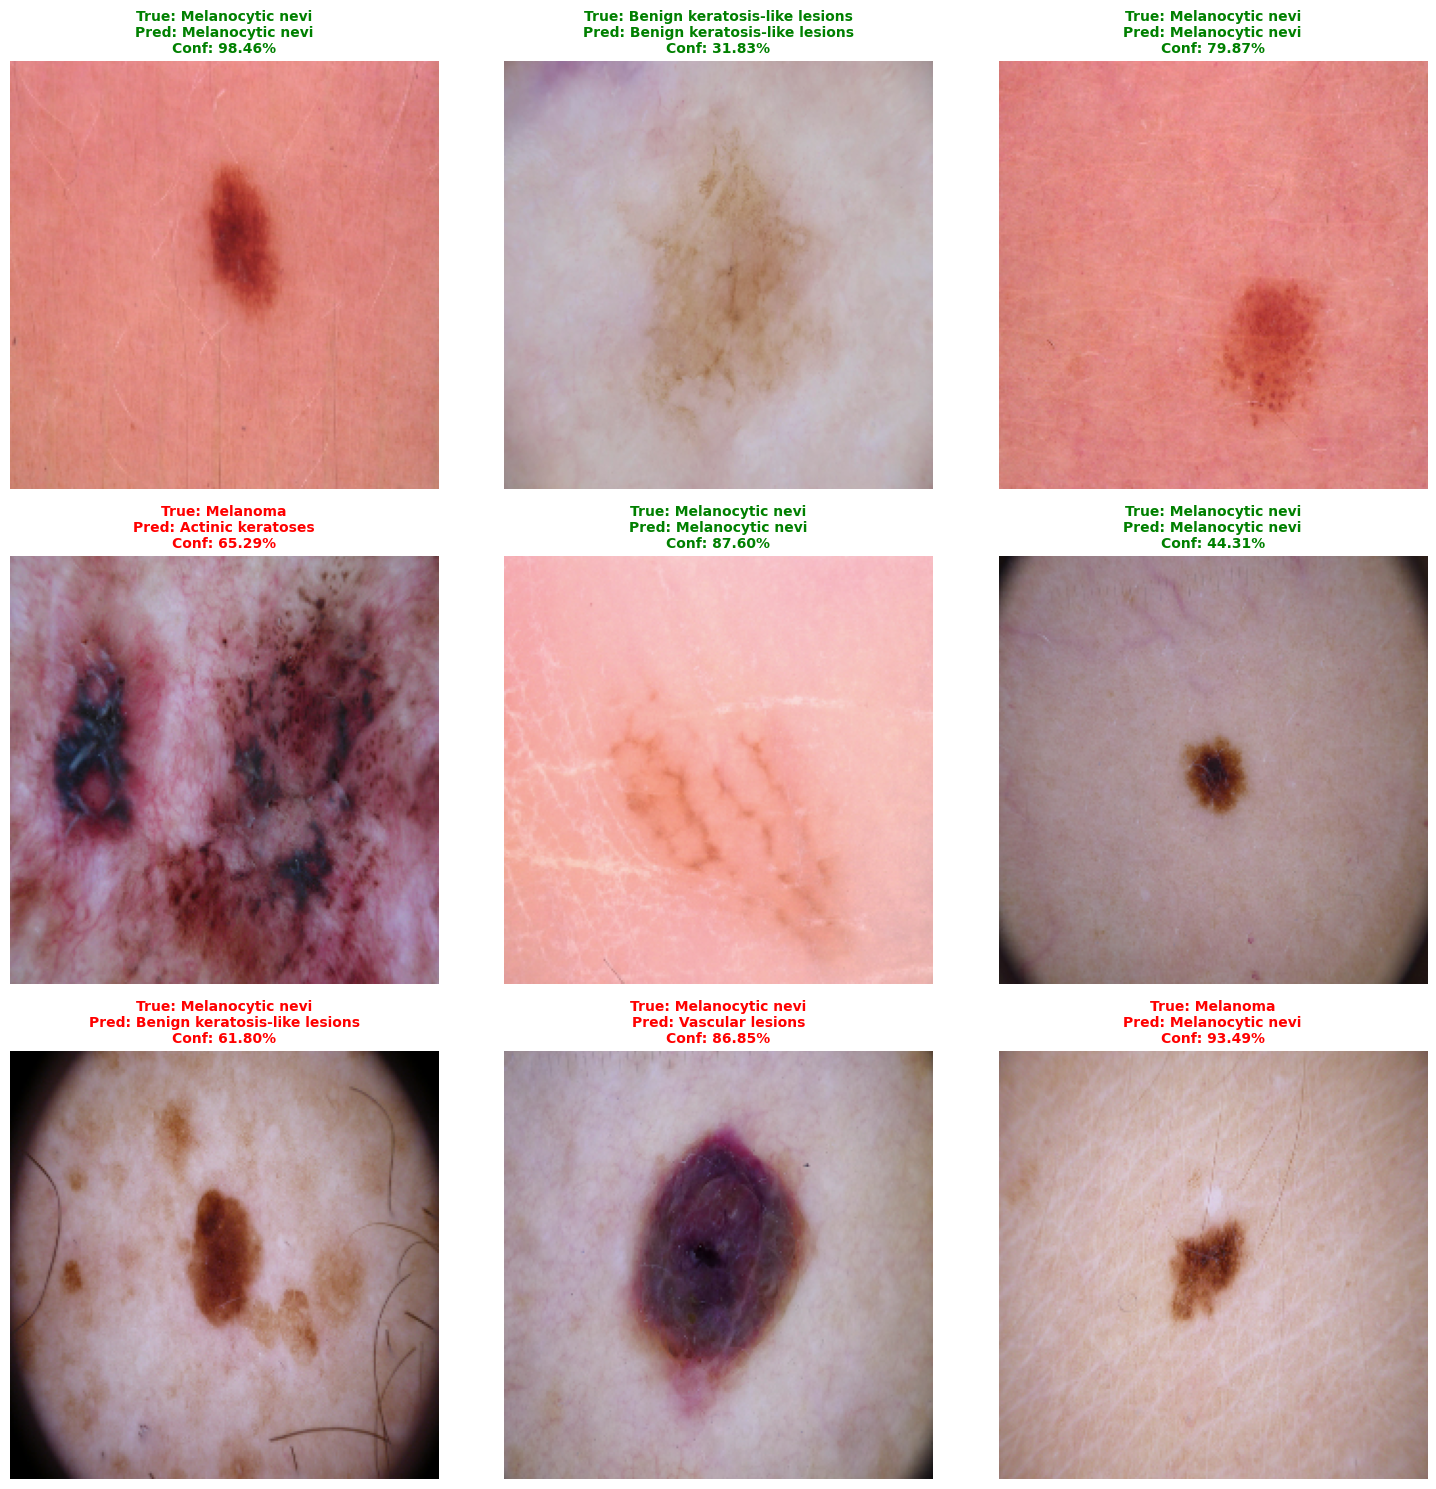

In [ ]:
print("\n" + "=" * 50)
print("Sample Predictions Visualization")
print("=" * 50)
visualize_predictions(densenet_model, test_ds, class_names, num_samples=9)       # Show predicted samples

In [ ]:
# ===================== Model Comparison =====================

import pandas as pd  # DataFrame for organizing results
from sklearn.metrics import roc_auc_score  # For calculating AUC

# ---- EfficientNetB0 Test Metrics ----
test_loss_en, test_acc_en = model.evaluate(test_ds, verbose=0)  # Evaluate on test set

y_true_en = []           # Store true labels
y_pred_proba_en = []     # Store predicted probabilities

for images, labels in test_ds:                        # Loop over test dataset
    preds = model.predict(images, verbose=0)          # Predict probabilities
    y_true_en.extend(labels.numpy())                  # Append true labels
    y_pred_proba_en.extend(preds)                     # Append predicted probabilities

y_true_en = np.array(y_true_en)                       # Convert true labels to NumPy array
y_pred_proba_en = np.array(y_pred_proba_en)           # Convert predictions to NumPy array

# Compute overall macro AUC, handle exceptions if not possible
try:
    overall_auc_en = roc_auc_score(
        y_true_en,
        y_pred_proba_en,
        multi_class='ovr',
        average='macro'
    )
except:
    overall_auc_en = None

# ---- DenseNet121 Test Metrics ----
test_loss_dn, test_acc_dn = densenet_model.evaluate(test_ds, verbose=0)  # Evaluate DenseNet121

y_true_dn = []            # Store true labels
y_pred_proba_dn = []      # Store predicted probabilities

for images, labels in test_ds:                        # Loop over test dataset
    preds = densenet_model.predict(images, verbose=0) # Predict probabilities
    y_true_dn.extend(labels.numpy())                  # Append true labels
    y_pred_proba_dn.extend(preds)                     # Append predicted probabilities

y_true_dn = np.array(y_true_dn)                       # Convert true labels to NumPy array
y_pred_proba_dn = np.array(y_pred_proba_dn)           # Convert predictions to NumPy array

# Compute overall macro AUC, handle exceptions if not possible
try:
    overall_auc_dn = roc_auc_score(
        y_true_dn,
        y_pred_proba_dn,
        multi_class='ovr',
        average='macro'
    )
except:
    overall_auc_dn = None

# ---- Create Comparison Table ----
comparison_df = pd.DataFrame({
    "Model": ["EfficientNetB0", "DenseNet121"],       # Model names
    "Test Accuracy": [test_acc_en, test_acc_dn],      # Test accuracies
    "Test Loss": [test_loss_en, test_loss_dn],        # Test losses
    "Overall Test AUC": [overall_auc_en, overall_auc_dn]  # Overall macro AUCs
})

print("\nModel Comparison on Test Set:")
display(comparison_df)  # Display comparison table



Model Comparison on Test Set:


Model  Test Accuracy  Test Loss  Overall Test AUC
0  EfficientNetB0       0.097430   1.896853          0.594776
1     DenseNet121       0.694861   0.907228          0.904124

In [ ]:
import gradio as gr                                # Gradio library for building web UI
import tensorflow as tf                            # TensorFlow for loading and running models
import numpy as np                                 # Numerical computations
from PIL import Image                              # Image handling
import json                                        # JSON handling (if needed)
import matplotlib.pyplot as plt                    # Plotting library
import seaborn as sns                              # Visualization (heatmaps, styles)
from io import BytesIO                             # In-memory binary streams
import base64                                      # Base64 encoding (for images/HTML)


# =============================================
# Load Models and Class Names
# =============================================

# Load your trained models
try:
    efficientnet_model = tf.keras.models.load_model(
        'best_model.keras'
    )                                              # Load EfficientNet model
    densenet_model = tf.keras.models.load_model(
        'densenet_model.keras'
    )                                              # Load DenseNet model
    models_loaded = True                           # Flag indicating models loaded successfully
except:
    print("Warning: Models not found. Using dummy predictions.")
    models_loaded = False                          # Use dummy predictions if loading fails

# Load class names
class_names = [
    'Actinic keratoses',
    'Basal cell carcinoma',
    'Benign keratosis-like lesions',
    'Dermatofibroma',
    'Melanocytic nevi',
    'Melanoma',
    'Vascular lesions'
]                                                  # Same class order used during training


# Lesion information dictionary
lesion_info = {
    'Melanoma': {
        'description': 'A serious form of skin cancer that develops in melanocytes (pigment cells).',
        'risk': 'HIGH RISK',
        'color': '#FF4444',
        'recommendation': '⚠️ Urgent: Consult a dermatologist immediately for biopsy and treatment.'
    },
    'Basal cell carcinoma': {
        'description': 'The most common type of skin cancer, slow-growing and rarely spreads.',
        'risk': 'MODERATE RISK',
        'color': '#FFA500',
        'recommendation': '⚡ Important: Schedule an appointment with a dermatologist soon.'
    },
    'Actinic keratoses': {
        'description': 'Precancerous patches caused by sun damage that can develop into cancer.',
        'risk': 'MODERATE RISK',
        'color': '#FFA500',
        'recommendation': '⚡ Important: Get evaluated by a dermatologist for treatment options.'
    },
    'Melanocytic nevi': {
        'description': 'Common moles that are usually benign (non-cancerous).',
        'risk': 'LOW RISK',
        'color': '#4CAF50',
        'recommendation': '✓ Monitor regularly for changes. Annual dermatology check recommended.'
    },
    'Benign keratosis-like lesions': {
        'description': 'Non-cancerous skin growths including seborrheic keratoses.',
        'risk': 'LOW RISK',
        'color': '#4CAF50',
        'recommendation': '✓ Generally harmless. Consult if it causes discomfort or changes.'
    },
    'Dermatofibroma': {
        'description': 'Benign skin growths composed of fibrous tissue.',
        'risk': 'LOW RISK',
        'color': '#4CAF50',
        'recommendation': '✓ Benign condition. Usually no treatment needed unless bothersome.'
    },
    'Vascular lesions': {
        'description': 'Blood vessel abnormalities in the skin, usually benign.',
        'risk': 'LOW RISK',
        'color': '#4CAF50',
        'recommendation': '✓ Generally benign. Consult if rapidly changing or bleeding.'
    }
}

# =============================================
# Helper Functions
# =============================================

def preprocess_image(image):
    """Preprocess image for model prediction"""
    if image is None:
        return None                               # Handle empty input

    if not isinstance(image, Image.Image):
        image = Image.fromarray(image)            # Convert NumPy array to PIL Image

    image = image.convert('RGB')                  # Ensure RGB format
    image = image.resize((224, 224))              # Resize to model input size

    img_array = np.array(image) / 255.0           # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

    return img_array


def predict_with_model(image, model, model_name):
    """Make prediction with a specific model"""
    if not models_loaded:
        probs = np.random.dirichlet(
            np.ones(len(class_names))
        )                                         # Dummy probabilities
        pred_idx = np.argmax(probs)
        return class_names[pred_idx], float(probs[pred_idx]), probs

    img_array = preprocess_image(image)           # Preprocess input image

    if img_array is None:
        return None, None, None

    predictions = model.predict(
        img_array, verbose=0
    )                                             # Run inference

    pred_idx = np.argmax(predictions[0])          # Predicted class index
    pred_class = class_names[pred_idx]             # Class name
    confidence = float(predictions[0][pred_idx])  # Confidence score

    return pred_class, confidence, predictions[0]


def create_probability_chart(probabilities, predicted_class):
    """Create a bar chart of class probabilities"""
    fig, ax = plt.subplots(figsize=(10, 6))       # Create figure

    sorted_indices = np.argsort(probabilities)[::-1]
    sorted_probs = probabilities[sorted_indices]
    sorted_names = [class_names[i] for i in sorted_indices]

    colors = [
        '#4CAF50' if name == predicted_class else '#2196F3'
        for name in sorted_names
    ]                                             # Highlight predicted class

    bars = ax.barh(sorted_names, sorted_probs, color=colors)

    for i, (bar, prob) in enumerate(zip(bars, sorted_probs)):
        ax.text(
            prob + 0.01, i,
            f'{prob*100:.1f}%',
            va='center',
            fontsize=10,
            fontweight='bold'
        )                                         # Percentage labels

    ax.set_xlabel('Probability', fontsize=12, fontweight='bold')
    ax.set_title('Prediction Probabilities by Class',
                 fontsize=14, fontweight='bold')
    ax.set_xlim(0, 1.0)

    plt.tight_layout()

    return fig


def format_result(pred_class, confidence, probabilities, model_name):
    """Format prediction results as HTML"""
    info = lesion_info.get(
        pred_class,
        {
            'description': 'Unknown lesion type',
            'risk': 'UNKNOWN',
            'color': '#999999',
            'recommendation': 'Consult a healthcare professional.'
        }
    )                                             # Fetch lesion info

    chart = create_probability_chart(
        probabilities, pred_class
    )                                             # Generate probability chart

    # Create HTML output
    html = f"""
    <div style="padding: 20px; border-radius: 10px; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);">
        <h2 style="color: white; text-align: center; margin-bottom: 20px;">
            🔬 Analysis Results - {model_name}
        </h2>
    </div>

    <div style="padding: 30px; background: white; border-radius: 10px; margin-top: 20px; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
        <div style="background: {info['color']}; color: white; padding: 15px; border-radius: 8px; margin-bottom: 20px;">
            <h3 style="margin: 0; font-size: 24px;">🎯 Predicted: {pred_class}</h3>
            <p style="margin: 10px 0 0 0; font-size: 18px;">Confidence: {confidence*100:.2f}%</p>
        </div>

        <div style="background: #f5f5f5; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
            <h4 style="color: #333; margin-top: 0;">📋 Description:</h4>
            <p style="color: #666; line-height: 1.6;">{info['description']}</p>
        </div>

        <div style="background: {info['color']}20; padding: 20px; border-radius: 8px; border-left: 4px solid {info['color']}; margin-bottom: 20px;">
            <h4 style="color: {info['color']}; margin-top: 0;">⚕️ Risk Level: {info['risk']}</h4>
            <p style="color: #333; line-height: 1.6; font-weight: 500;">{info['recommendation']}</p>
        </div>

        <div style="background: #fff3cd; padding: 15px; border-radius: 8px; border-left: 4px solid #ffc107;">
            <p style="margin: 0; color: #856404; font-weight: 500;">
                ⚠️ <strong>Disclaimer:</strong> This is an AI-assisted prediction tool and should NOT replace professional medical diagnosis.
                Always consult a qualified dermatologist for accurate diagnosis and treatment.
            </p>
        </div>
    </div>
    """

    return html, chart

# =============================================
#  Prediction Functions (Gradio)
# =============================================
# These functions are directly connected to the Gradio buttons.
# Each function:
# 1) Receives an image uploaded by the user
# 2) Runs inference using a specific model
# 3) Formats the output (HTML + probability chart)
# 4) Returns results to be displayed in the UI


def predict_efficientnet(image):
    """
    Perform prediction using the EfficientNetB0 model.

    Parameters:
        image (PIL.Image): Uploaded image from Gradio interface

    Returns:
        html_result (str): Formatted HTML containing prediction details
        chart (matplotlib.figure): Probability distribution plot
    """
    # Handle case where no image is uploaded
    if image is None:
        return "Please upload an image", None

    # Run prediction using EfficientNet model
    pred_class, confidence, probs = predict_with_model(
        image,
        efficientnet_model if models_loaded else None,
        "EfficientNetB0"
    )

    # If prediction failed, return error message
    if pred_class is None:
        return "Error processing image", None

    # Format the prediction results for UI display
    html_result, chart = format_result(
        pred_class,
        confidence,
        probs,
        "EfficientNetB0"
    )

    return html_result, chart


def predict_densenet(image):
    """
    Perform prediction using the DenseNet121 model.

    Parameters:
        image (PIL.Image): Uploaded image from Gradio interface

    Returns:
        html_result (str): Formatted HTML containing prediction details
        chart (matplotlib.figure): Probability distribution plot
    """
    # Handle case where no image is uploaded
    if image is None:
        return "Please upload an image", None

    # Run prediction using DenseNet model
    pred_class, confidence, probs = predict_with_model(
        image,
        densenet_model if models_loaded else None,
        "DenseNet121"
    )

    # If prediction failed, return error message
    if pred_class is None:
        return "Error processing image", None

    # Format the prediction results for UI display
    html_result, chart = format_result(
        pred_class,
        confidence,
        probs,
        "DenseNet121"
    )

    return html_result, chart


def predict_ensemble(image):
    """
    Perform prediction using an ensemble of EfficientNetB0 and DenseNet121.
    The final prediction is based on the average probabilities from both models.

    Parameters:
        image (PIL.Image): Uploaded image from Gradio interface

    Returns:
        html_result (str): Formatted HTML containing prediction details
        chart (matplotlib.figure): Probability distribution plot
    """
    # Handle case where no image is uploaded
    if image is None:
        return "Please upload an image", None

    # Get predictions from EfficientNet
    pred_en, conf_en, probs_en = predict_with_model(
        image,
        efficientnet_model if models_loaded else None,
        "EfficientNetB0"
    )

    # Get predictions from DenseNet
    pred_dn, conf_dn, probs_dn = predict_with_model(
        image,
        densenet_model if models_loaded else None,
        "DenseNet121"
    )

    # If any model fails, return error message
    if pred_en is None or pred_dn is None:
        return "Error processing image", None

    # Average probabilities from both models
    avg_probs = (probs_en + probs_dn) / 2

    # Select class with highest average probability
    pred_idx = np.argmax(avg_probs)
    pred_class = class_names[pred_idx]
    confidence = float(avg_probs[pred_idx])

    # Format ensemble prediction results
    html_result, chart = format_result(
        pred_class,
        confidence,
        avg_probs,
        "Ensemble (EfficientNet + DenseNet)"
    )

    return html_result, chart

# =============================================
# Gradio Interface
# =============================================
# This section defines the full Gradio user interface (UI),
# including layout, tabs, buttons, inputs, outputs, and styling.


# Custom CSS for styling the Gradio interface
custom_css = """
.gradio-container {
    font-family: 'Arial', sans-serif;              # Set global font
}
.gr-button-primary {
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%) !important;  # Gradient button
    border: none !important;                       # Remove default border
}
.gr-button-primary:hover {
    transform: translateY(-2px);                   # Slight lift effect on hover
    box-shadow: 0 5px 15px rgba(102, 126, 234, 0.4); # Shadow effect on hover
}
"""


# Create the main Gradio application container
with gr.Blocks(css=custom_css, title="Skin Cancer Detection") as demo:

    # Main title and description displayed at the top of the app
    gr.Markdown("""
    # 🔬 Skin Lesion Analysis System
    ### AI-Powered Skin Cancer Detection using Deep Learning

    Upload an image of a skin lesion to get instant analysis from our trained models.
    This system uses state-of-the-art deep learning models (EfficientNetB0 & DenseNet121)
    trained on the HAM10000 dataset.
    """)

    # Create tab-based navigation
    with gr.Tabs():

        # =================================================
        # Tab 1: EfficientNetB0
        # =================================================
        with gr.Tab("🚀 EfficientNetB0"):
            with gr.Row():

                # Left column: image upload + button
                with gr.Column(scale=1):
                    input_image_en = gr.Image(
                        label="Upload Skin Lesion Image",  # Image input label
                        type="pil",                        # Return image as PIL.Image
                        height=400                         # Display height
                    )

                    predict_btn_en = gr.Button(
                        "🔍 Analyze with EfficientNetB0",  # Button text
                        variant="primary",                 # Primary styled button
                        size="lg"                          # Large button size
                    )

                    gr.Examples(
                        examples=[],                       # Optional example images
                        inputs=input_image_en,
                        label="Example Images"
                    )

                # Right column: prediction results
                with gr.Column(scale=1):
                    output_html_en = gr.HTML(label="Analysis Results")  # HTML prediction output
                    output_chart_en = gr.Plot(label="Probability Distribution")  # Probability plot

            # Connect EfficientNet prediction button to function
            predict_btn_en.click(
                fn=predict_efficientnet,                   # Prediction function
                inputs=input_image_en,                     # Image input
                outputs=[output_html_en, output_chart_en]  # Outputs (HTML + plot)
            )

        # =================================================
        # Tab 2: DenseNet121
        # =================================================
        with gr.Tab("🧬 DenseNet121"):
            with gr.Row():

                # Left column: image upload + button
                with gr.Column(scale=1):
                    input_image_dn = gr.Image(
                        label="Upload Skin Lesion Image",
                        type="pil",
                        height=400
                    )

                    predict_btn_dn = gr.Button(
                        "🔍 Analyze with DenseNet121",
                        variant="primary",
                        size="lg"
                    )

                    gr.Examples(
                        examples=[],
                        inputs=input_image_dn,
                        label="Example Images"
                    )

                # Right column: prediction results
                with gr.Column(scale=1):
                    output_html_dn = gr.HTML(label="Analysis Results")
                    output_chart_dn = gr.Plot(label="Probability Distribution")

            # Connect DenseNet prediction button to function
            predict_btn_dn.click(
                fn=predict_densenet,
                inputs=input_image_dn,
                outputs=[output_html_dn, output_chart_dn]
            )

        # =================================================
        # Tab 3: Ensemble Model
        # =================================================
        with gr.Tab("🎯 Ensemble Model"):
            with gr.Row():

                # Left column: image upload + button
                with gr.Column(scale=1):
                    input_image_ens = gr.Image(
                        label="Upload Skin Lesion Image",
                        type="pil",
                        height=400
                    )

                    predict_btn_ens = gr.Button(
                        "🔍 Analyze with Ensemble",
                        variant="primary",
                        size="lg"
                    )

                    gr.Examples(
                        examples=[],
                        inputs=input_image_ens,
                        label="Example Images"
                    )

                # Right column: prediction results
                with gr.Column(scale=1):
                    output_html_ens = gr.HTML(label="Analysis Results")
                    output_chart_ens = gr.Plot(label="Probability Distribution")

            # Connect Ensemble prediction button to function
            predict_btn_ens.click(
                fn=predict_ensemble,
                inputs=input_image_ens,
                outputs=[output_html_ens, output_chart_ens]
            )

        # =================================================
        # Tab 4: About Section
        # =================================================
        with gr.Tab("ℹ️ About"):
            gr.Markdown("""
            ## About This System

            This skin cancer detection system uses deep learning to analyze skin lesion images and
            classify them into 7 different categories:

            ### 🎯 Classes:
            1. **Melanoma** - Malignant skin cancer (HIGH RISK)
            2. **Basal Cell Carcinoma** - Most common skin cancer (MODERATE RISK)
            3. **Actinic Keratoses** - Precancerous lesions (MODERATE RISK)
            4. **Melanocytic Nevi** - Common moles (LOW RISK)
            5. **Benign Keratosis** - Non-cancerous growths (LOW RISK)
            6. **Dermatofibroma** - Benign fibrous tissue (LOW RISK)
            7. **Vascular Lesions** - Blood vessel abnormalities (LOW RISK)

            ### 🤖 Models:
            - **EfficientNetB0**: Efficient and accurate CNN architecture
            - **DenseNet121**: Dense connections for better feature propagation
            - **Ensemble**: Combines predictions from both models for higher accuracy

            ### 📊 Dataset:
            Trained on HAM10000 dataset containing 10,000+ dermatoscopic images

            ### ⚠️ Important Disclaimer:
            This tool is for educational and research purposes only. It should NOT be used as a
            substitute for professional medical advice, diagnosis, or treatment.
            """)

    # Footer disclaimer shown at the bottom of the app
    gr.Markdown("""
    ---
    <div style="text-align: center; color: #666; padding: 20px;">
        <p><strong>⚠️ Medical Disclaimer:</strong> This AI system is a research tool and should not replace professional medical diagnosis.</p>
        <p>Developed using TensorFlow & Gradio | © 2024</p>
    </div>
    """)


# =============================================
# Launch the app
# =============================================
# This block runs the Gradio server
# and makes the web application available.

if __name__ == "__main__":
    demo.launch(
        share=False,            # Set True to generate a public shareable link
        server_name="0.0.0.0",  # Allow access from external devices
        server_port=7860,       # Server port
        show_error=True         # Show detailed error messages
    )


/tmp/ipython-input-322327910.py:296: DeprecationWarning: The 'css' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'css' to Blocks.launch() instead.
  with gr.Blocks(css=custom_css, title="Skin Cancer Detection") as demo:


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>